In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
df.shape

(1599, 12)

In [17]:
df['Result'] = (df['quality']>=7).astype(int)
df.drop('quality',axis=1,inplace=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Result
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [19]:
col = df.columns
for i in col:
    print(df[i].isnull().any())    #null value in each columns

False
False
False
False
False
False
False
False
False
False
False
False


In [21]:
corelation_matrix = df.corr()
print(corelation_matrix)   #to check corelation of various features on result

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
Result                     0.120061         -0.270712     0.214716   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

In [33]:
#df.columns
col = [x for x in df.columns if x not in 'Result']
x_train,x_test,y_train,y_test = train_test_split(df[col],df['Result'],test_size=0.3,random_state=1)

In [34]:
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.fit_transform(x_test)

# Decision Tree :

In [51]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.

In [52]:
acc_train = []
acc_test = []
for i in min_samples_split_list:
    model = DecisionTreeClassifier(min_samples_split=i,random_state=1)
    model.fit(x_train_norm,y_train)
    y_pred_train = model.predict(x_train_norm)
    y_pred_test = model.predict(x_test_norm)
    acc_test.append(accuracy_score(y_pred_test,y_test))
    acc_train.append(accuracy_score(y_pred_train,y_train))


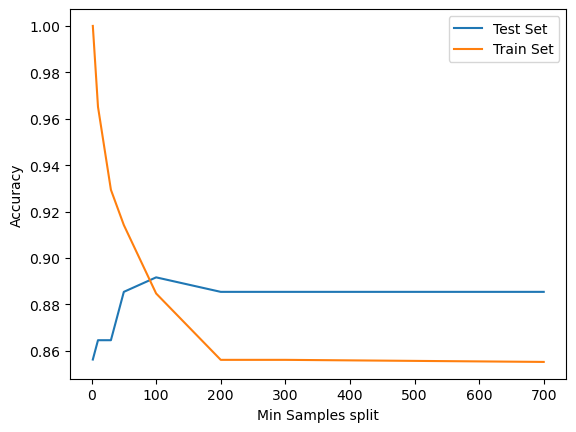

In [53]:
plt.plot(min_samples_split_list,acc_test,label='Test Set')
plt.plot(min_samples_split_list,acc_train,label='Train Set')
plt.ylabel('Accuracy')
plt.xlabel('Min Samples split')
plt.legend()
#Minsamples set to 100

In [54]:
acc_train= []
acc_test= []
for i in max_depth_list:
    model = DecisionTreeClassifier(max_depth = i,random_state=1)
    model.fit(x_train_norm,y_train)
    y_pred_train = model.predict(x_train_norm)
    y_pred_test = model.predict(x_test_norm)
    acc_train.append(accuracy_score(y_pred_train,y_train))
    acc_test.append(accuracy_score(y_pred_test,y_test))

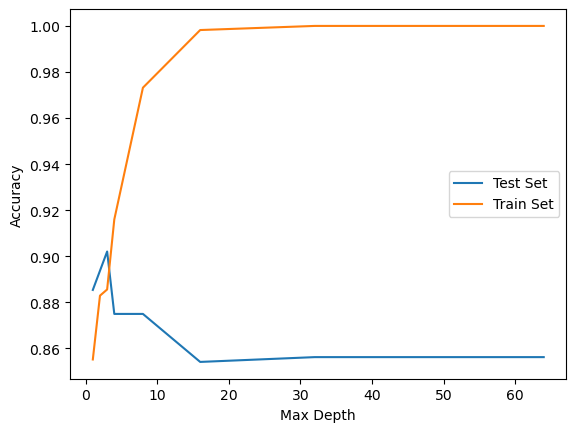

In [55]:
plt.plot(max_depth_list,acc_test,label='Test Set')
plt.plot(max_depth_list,acc_train,label='Train Set')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
#max_depth set to 5

In [83]:
model = DecisionTreeClassifier(max_depth=5, min_samples_split=100, random_state=1)
model.fit(x_train_norm,y_train)
y_pred = model.predict(x_test_norm)
acc = accuracy_score(y_pred,y_test)
f1 = f1_score(y_pred,y_test)
print(f'Acccuracy: {acc} F1 Score: {f1}')

Acccuracy: 0.89375 F1 Score: 0.41379310344827586


# Random Tree Classifier

In [62]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.
n_estimators_list = [10,50,100,500]

In [63]:
acc_train = []
acc_test = []
for i in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split=i,random_state=1)
    model.fit(x_train_norm,y_train)
    y_pred_train = model.predict(x_train_norm)
    y_pred_test = model.predict(x_test_norm)
    acc_test.append(accuracy_score(y_pred_test,y_test))
    acc_train.append(accuracy_score(y_pred_train,y_train))


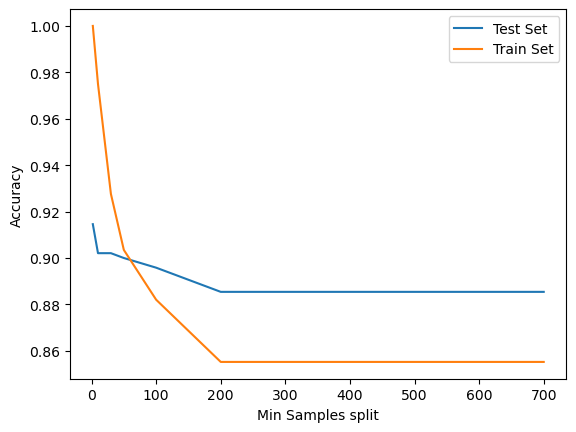

In [64]:
plt.plot(min_samples_split_list,acc_test,label='Test Set')
plt.plot(min_samples_split_list,acc_train,label='Train Set')
plt.ylabel('Accuracy')
plt.xlabel('Min Samples split')
plt.legend()
#Minsamples set to 80

In [67]:
acc_train = []
acc_test = []
for i in n_estimators_list:
    model = RandomForestClassifier(n_estimators=i,random_state=1)
    model.fit(x_train_norm,y_train)
    y_pred_train = model.predict(x_train_norm)
    y_pred_test = model.predict(x_test_norm)
    acc_test.append(accuracy_score(y_pred_test,y_test))
    acc_train.append(accuracy_score(y_pred_train,y_train))


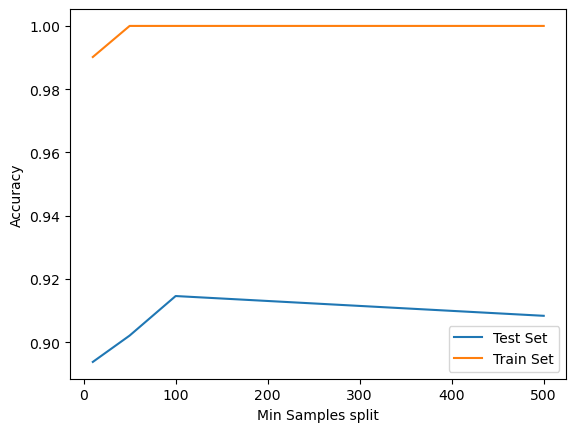

In [69]:
plt.plot(n_estimators_list,acc_test,label='Test Set')
plt.plot(n_estimators_list,acc_train,label='Train Set')
plt.ylabel('Accuracy')
plt.xlabel('Min Samples split')
plt.legend()
#n_estimators set to 100

In [70]:
acc_train= []
acc_test= []
for i in max_depth_list:
    model = RandomForestClassifier(max_depth = i,random_state=1)
    model.fit(x_train_norm,y_train)
    y_pred_train = model.predict(x_train_norm)
    y_pred_test = model.predict(x_test_norm)
    acc_train.append(accuracy_score(y_pred_train,y_train))
    acc_test.append(accuracy_score(y_pred_test,y_test))

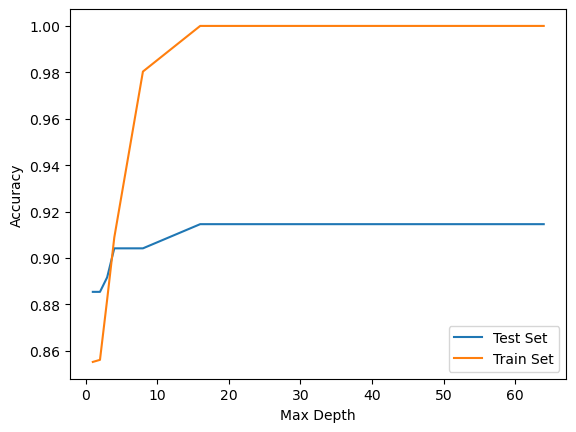

In [71]:
plt.plot(max_depth_list,acc_test,label='Test Set')
plt.plot(max_depth_list,acc_train,label='Train Set')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
#max_depth set to 5

In [81]:
model = RandomForestClassifier(max_depth=5, min_samples_split=100, n_estimators=5, random_state=1)
model.fit(x_train_norm,y_train)
y_pred = model.predict(x_test_norm)
acc = accuracy_score(y_pred,y_test)
f1= f1_score(y_pred,y_test)
print(f'Accuracy: {acc} F1 Score: {f1}')

Accuracy: 0.9020833333333333 F1 Score: 0.3380281690140845
